# SNOW partitioning

The filter is used to partition an image into regions using the [SNOW](https://journals.aps.org/pre/abstract/10.1103/PhysRevE.96.023307) algorithm which stands for the subnetwork of the oversegmented watershed. The steps taken are described in detail in the snow_advanced notebook. We provide a filter function that combines all the steps and it is explored here:

In [1]:
import numpy as np
import porespy as ps
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from skimage.morphology import binary_dilation
ps.visualization.set_mpl_style()
np.random.seed(1)

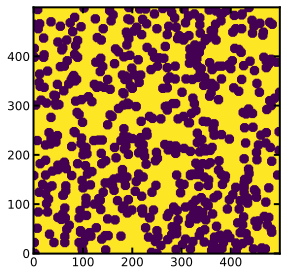

In [2]:
im = ps.generators.overlapping_spheres([500, 500], r=10, porosity=0.5)
fig, ax = plt.subplots()
ax.imshow(im, origin='lower');

In [3]:
snow_out = ps.filters.snow_partitioning(im, r_max=4, sigma=0.4)
print(snow_out)

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Item                      Description
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
im                        Image of size (500, 500)
dt                        Image of size (500, 500)
peaks                     Image of size (500, 500)
regions                   Image of size (500, 500)
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――


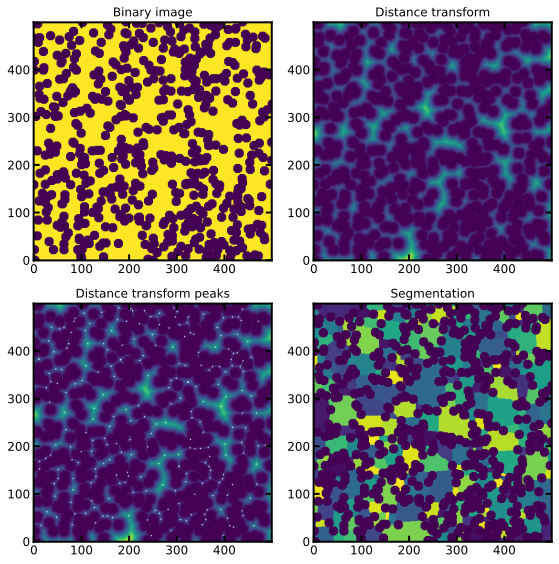

In [4]:
fig, ax = plt.subplots(2, 2, figsize=[8, 8])
ax[0, 0].imshow(snow_out.im, origin='lower')
ax[0, 1].imshow(snow_out.dt, origin='lower')
dt_peak = snow_out.dt.copy()
peaks_dilated = binary_dilation(snow_out.peaks > 0)
dt_peak[peaks_dilated > 0] = np.nan
ax[1, 0].imshow(dt_peak, origin='lower')
ax[1, 1].imshow(ps.tools.randomize_colors(snow_out.regions), origin='lower')
ax[0, 0].set_title("Binary image");
ax[0, 1].set_title("Distance transform");
ax[1, 0].set_title("Distance transform peaks");
ax[1, 1].set_title("Segmentation");